In [235]:
import pandas as pd

In [237]:
df1 = pd.read_csv(r"C:\Users\Julius\Desktop\Training and Interns\Uptrail intern\Week 2\Project Files\customer_info.csv") 
# customer info

In [239]:
df3 = pd.read_csv(r"C:\Users\Julius\Desktop\Training and Interns\Uptrail intern\Week 2\Project Files\product_info.csv")
# productinfo

In [241]:
df2 = pd.read_csv(r"C:\Users\Julius\Desktop\Training and Interns\Uptrail intern\Week 2\Project Files\sales_data.csv")
#sales info

In [243]:
rows_number = df2.shape[0]
column_number = df2.shape[1]
print (rows_number, column_number)   # sales info has 3000 rows and 10 columns

3000 10


In [245]:
df2.dtypes

order_id             object
customer_id          object
product_id           object
quantity             object
unit_price          float64
order_date           object
delivery_status      object
payment_method       object
region               object
discount_applied    float64
dtype: object

In [247]:
df2.isnull().sum()

order_id              1
customer_id           2
product_id            5
quantity              3
unit_price            1
order_date            3
delivery_status       3
payment_method        3
region                0
discount_applied    517
dtype: int64

In [249]:
# a) customer_id, product_id and order_id: 2 missing values, 5 missing values and 1 value respectively
        # I am going to look for the missing values by matching them to which row they appear in the data frame.
        # To ensure that they are consistent i will first sort the data frame and then look them up

df2_sorted = df2.sort_values(by='customer_id', ascending=True)
missing_customerid = df2_sorted[df2_sorted['customer_id'].isna()] 
missing_orderid = df2_sorted[df2_sorted['order_id'].isna()]
missing_product_id = df2_sorted[df2_sorted['product_id'].isna()] 
print (missing_customerid)
print (missing_orderid)
print (missing_product_id)
        # customer_ids, product ids and order ids which are missing are very impractical to replace in this data set as they will affect the other 2 data sets
        # These missing values are unique and can only be assigned from the source documents       
        # I am going to drop these 8 entries, the number is small so will not affect my analysis greatly, il still have 2992 entries

     order_id customer_id product_id quantity  unit_price order_date  \
851   O663482         NaN      P0029        3       18.89   06-07-25   
1707  O735004         NaN      P0017        2       12.18   06-07-25   

     delivery_status payment_method   region  discount_applied  
851       Cancelled          PayPal     West              0.05  
1707       delivered  Bank Transfer  Central               NaN  
    order_id customer_id product_id quantity  unit_price order_date  \
862      NaN      C00237      P0013        1       39.26   06-07-25   

    delivery_status payment_method region  discount_applied  
862         Delayed    Credit Card   West               0.2  
     order_id customer_id product_id quantity  unit_price order_date  \
569   O711887      C00125        NaN        5       36.65   06-07-25   
613   O231318      C00251        NaN        5       47.51   06-07-25   
2803  O140946      C00251        NaN        3       22.20   06-07-25   
1841  O218065      C00324        

In [251]:
df2 = df2.dropna(subset=['order_id', 'customer_id', 'product_id'])

In [253]:
df2.shape[0]

2992

In [11]:
#normalise customer_id, order_id and product_id

df2.loc[:, 'customer_id'] = df2['customer_id'].astype(str).str.strip().str.capitalize()
df2.loc[:, 'order_id'] = df2['order_id'].astype(str).str.strip().str.capitalize()
df2.loc[:, 'product_id'] = df2['product_id'].astype(str).str.strip().str.capitalize()

In [12]:
# b) quantity - 3 missing values

# ensure all entries here are numeric or else be cast as null values
df2['quantity'] = pd.to_numeric(df2['quantity'], errors='coerce')
df2[df2['quantity'].isna()]    # 2 more invalid entries have been cast as missing values (Total 5 missing values)

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region,discount_applied
1113,O718743,C00209,P0024,NaN,43.59,06-07-25,Delivered,credit card,Central,0.0
1712,O490113,C00286,P0010,NaN,13.49,06-07-25,DELAYED,Bank Transfer,South,0.2
2223,O189925,C00098,P0013,NaN,46.37,06-07-25,Delivered,Bank Transfer,South,NaN
2344,O624662,C00185,P0026,NaN,35.43,06-07-25,delivered,Bank Transfer,East,NaN
2768,O557598,C00010,P0002,NaN,26.68,06-07-25,Delayed,credit card,East,0.2


In [13]:
# replacing missing values on quantity
quantitysummary = df2.groupby('region')['quantity'].agg(
    mean = 'mean',
    std = 'std',
    median = 'median',
    min = 'min',
    max = 'max'
)
print (quantitysummary)  # the mean and median of quantity are the same ie 3, therefore all missing values of quantity shall be filled with 3

             mean       std  median  min  max
region                                       
Central  2.993344  1.428270     3.0  1.0  5.0
East     2.981636  1.404006     3.0  1.0  5.0
North    2.930464  1.425356     3.0  1.0  5.0
South    3.079258  1.430410     3.0  1.0  5.0
West     3.025467  1.348101     3.0  1.0  5.0
nrth     1.000000       NaN     1.0  1.0  1.0


In [14]:
quantitysummary2 = df2['quantity'].agg(
    mean = 'mean',
    std = 'std',
    median = 'median',
    min = 'min',
    max = 'max'
)
print (quantitysummary2)

mean      3.001004
std       1.407924
median    3.000000
min       1.000000
max       5.000000
Name: quantity, dtype: float64


In [15]:
import numpy as np
df2['quantity'] = df2['quantity'].fillna(3)

In [16]:
df2.isnull().sum()

order_id              0
customer_id           0
product_id            0
quantity              0
unit_price            1
order_date            3
delivery_status       3
payment_method        3
region                0
discount_applied    516
dtype: int64

In [17]:
# c) unit price - 1 price
# This data set is already a float (numeric)

df2[df2['unit_price'].isna()]   

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region,discount_applied
496,O837867,C00350,P0028,4.0,NaN,06-07-25,delivered,Credit Card,East,0.15


In [18]:
# Filter to see if there any other product_id as P0028 and region as East so i can use it to get the unit price of the missing value

# Normalize region: remove extra spaces and capitalize first letter only
df2['region'] = df2['region'].str.strip().str.capitalize()

df2['region'].value_counts()


region
North      604
Central    602
East       601
South      595
West       589
Nrth         1
Name: count, dtype: int64

In [19]:
df2['region'] = df2['region'].replace('Nrth', 'North')

In [20]:
df2[(df2['product_id'] == 'P0028') & (df2['region'] == 'East')]  

    # from the output there is one entry at orderid '0295267' that is similar even on payment method and unit price was 30.03 so i will replace with that

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region,discount_applied
219,O550663,C00095,P0028,2.0,44.90,06-07-25,Delivered,PayPal,East,0.05
242,O609242,C00091,P0028,3.0,26.96,06-07-25,delivered,Credit Card,East,0.10
259,O295267,C00092,P0028,2.0,30.03,06-07-25,delivered,Credit Card,East,0.15
493,O779073,C00357,P0028,1.0,15.10,06-07-25,delyd,credit card,East,NaN
496,O837867,C00350,P0028,4.0,NaN,06-07-25,delivered,Credit Card,East,0.15
553,O207825,C00018,P0028,4.0,9.07,06-07-25,DELAYED,PayPal,East,0.05
1371,O477427,C00148,P0028,5.0,34.19,06-07-25,Delivered,credit card,East,NaN
1717,O816249,C00099,P0028,1.0,8.57,06-07-25,DELAYED,PayPal,East,0.05
1977,O839141,C00013,P0028,4.0,26.75,06-07-25,Delayed,PayPal,East,0.00
2084,O405375,C00025,P0028,4.0,15.81,06-07-25,Cancelled,Credit Card,East,NaN


In [21]:
df2['unit_price'] = df2['unit_price'].fillna(30.03)

In [22]:
# d) order_date - 3 missing values

#first format this to date time format
df2['order_date'] = pd.to_datetime(df2['order_date'], dayfirst=True, errors='coerce') 

# count of dates in the data frame
df2['order_date'].value_counts()  # all were bought on 2025-07-06 so i will fill the missing values with those


order_date
2025-07-06    2989
Name: count, dtype: int64

In [23]:
df2

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region,discount_applied
0,O966977,C00397,P0022,3.0,39.25,2025-07-06,Delivered,PayPal,Central,0.00
1,O696648,C00236,P0023,5.0,18.92,2025-07-06,DELAYED,credit card,North,0.00
2,O202644,C00492,P0011,1.0,29.68,2025-07-06,delivered,Bank Transfer,North,0.15
3,O501803,C00031,P0003,1.0,32.76,2025-07-06,Cancelled,Credit Card,Central,0.20
4,O322242,C00495,P0016,1.0,47.62,2025-07-06,DELAYED,Credit Card,West,0.20
...,...,...,...,...,...,...,...,...,...,...
2995,O868860,C00233,P0001,5.0,43.40,2025-07-06,Delivered,Bank Transfer,West,0.20
2996,O949709,C00246,P0029,4.0,34.04,2025-07-06,DELAYED,Bank Transfer,West,0.20
2997,O763639,C00182,P0026,1.0,42.34,2025-07-06,Delivered,credit card,South,0.00
2998,O753958,C00074,P0003,5.0,35.96,2025-07-06,Delivered,Credit Card,Central,0.00


In [24]:
df2.dtypes

order_id                    object
customer_id                 object
product_id                  object
quantity                   float64
unit_price                 float64
order_date          datetime64[ns]
delivery_status             object
payment_method              object
region                      object
discount_applied           float64
dtype: object

In [25]:
# replace missing order dates with '2025-07-06'
df2['order_date'] = df2['order_date'].fillna(pd.Timestamp('2025-07-06'))

In [26]:
# e) delivery_status

#first normalise all these 

df2['delivery_status'].value_counts() 


delivery_status
Delivered      635
delivered      593
 DELAYED       591
 Cancelled     589
Delayed        579
delrd            1
delyd            1
Name: count, dtype: int64

In [27]:
df2['delivery_status'] = df2['delivery_status'].str.strip().str.capitalize()
df2['delivery_status'].value_counts() 

delivery_status
Delivered    1228
Delayed      1170
Cancelled     589
Delrd           1
Delyd           1
Name: count, dtype: int64

In [28]:
df2['delivery_status'] = df2['delivery_status'].replace('Delrd', 'Delivered')
df2['delivery_status'] = df2['delivery_status'].replace('Delyd', 'Delivered')

In [29]:
df2['delivery_status'].value_counts() 

delivery_status
Delivered    1230
Delayed      1170
Cancelled     589
Name: count, dtype: int64

In [30]:
df2[df2['delivery_status'].isna()]  # fill the 3 missing values with the modal dleivery_status per region

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region,discount_applied
601,O112478,C00471,P0025,2.0,9.00,2025-07-06,NaN,Credit Card,North,0.20
733,O697006,C00324,P0015,5.0,42.49,2025-07-06,NaN,credit card,Central,NaN
1124,O239188,C00423,P0012,4.0,37.82,2025-07-06,NaN,credit card,East,0.05


In [31]:
df2['delivery_status'] = df2['delivery_status'].fillna(
    df2.groupby('region')['delivery_status'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
)

In [32]:
# f) payment_method

df2['payment_method'].value_counts() 

payment_method
Bank Transfer    778
PayPal           759
Credit Card      734
credit card      717
bank transfr       1
Name: count, dtype: int64

In [33]:
#first normalise all these 
df2['payment_method'] = df2['payment_method'].str.strip().str.capitalize()
df2['payment_method'].value_counts() 

payment_method
Credit card      1451
Bank transfer     778
Paypal            759
Bank transfr        1
Name: count, dtype: int64

In [34]:
df2['payment_method'] = df2['payment_method'].replace('Bank transfr', 'Bank transfer')

In [35]:
df2['payment_method'].value_counts() 

payment_method
Credit card      1451
Bank transfer     779
Paypal            759
Name: count, dtype: int64

In [36]:
df2[df2['payment_method'].isna()]  # replace these 3 with the modal payment method per region

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region,discount_applied
858,O687548,C00500,P0004,2.0,45.04,2025-07-06,Cancelled,NaN,West,0.15
963,O912757,C00248,P0025,1.0,29.30,2025-07-06,Delayed,NaN,East,0.05
1954,O331280,C00221,P0020,5.0,42.27,2025-07-06,Delayed,NaN,West,0.15


In [37]:
df2['payment_method'] = df2['payment_method'].fillna(
    df2.groupby('region')['payment_method'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
)

In [38]:
#g) discount applied; 
discount_applied = df2['discount_applied'].agg(
    mean = 'mean',
    std = 'std',
    median = 'median',
    min = 'min',
    max = 'max'
)
print (discount_applied)
    # the me

mean      0.100141
std       0.069971
median    0.100000
min       0.000000
max       0.200000
Name: discount_applied, dtype: float64


In [39]:
discount_applied2 = df2.groupby('payment_method')['discount_applied'].agg(
    mean = 'mean',
    std = 'std',
    median = 'median',
    min = 'min',
    max = 'max'
)
print (discount_applied2) 

                    mean       std  median  min  max
payment_method                                      
Bank transfer   0.101400  0.070642     0.1  0.0  0.2
Credit card     0.100288  0.069552     0.1  0.0  0.2
Paypal          0.098539  0.070176     0.1  0.0  0.2


In [40]:
discount_applied3 = df2.groupby('region')['discount_applied'].agg(
    mean = 'mean',
    std = 'std',
    median = 'median',
    min = 'min',
    max = 'max'
)
print (discount_applied3) 

             mean       std  median  min  max
region                                       
Central  0.099697  0.068566     0.1  0.0  0.2
East     0.094534  0.068898     0.1  0.0  0.2
North    0.103187  0.070000     0.1  0.0  0.2
South    0.102546  0.071562     0.1  0.0  0.2
West     0.100709  0.070743     0.1  0.0  0.2


In [41]:
# after overall mean and median of discount applied, and then aggregated it over payment method and region, the median = mean = 0.10
# replace missing values on discount applied with 0.10

df2['discount_applied'] = df2['discount_applied'].fillna(0.10)

In [42]:
df2.isnull().sum()   # no more missing data and all formating been done

order_id            0
customer_id         0
product_id          0
quantity            0
unit_price          0
order_date          0
delivery_status     0
payment_method      0
region              0
discount_applied    0
dtype: int64

In [43]:
df2.duplicated().sum() # no duplicates

0

In [44]:
df1
  # customer info data set has 500 rows and 6 columns

,customer_id,email,signup_date,gender,region,loyalty_tier
0,C00001,shaneramirez@gmail.com,26-04-25,Male,Central,Silver
1,C00002,jpeterson@bernard.com,11-08-24,Female,Central,gold
2,C00003,howardmaurice@yahoo.com,15-05-25,male,Central,gold
3,C00004,yherrera@arnold.org,14-06-25,FEMALE,Central,GOLD
4,C00005,janetwilliams@gmail.com,02-05-25,Male,West,bronze
...,...,...,...,...,...,...
495,C00496,simsjohn@wiley.net,19-02-25,femle,Central,GOLD
496,C00497,cameronwilliams@yahoo.com,30-12-24,NaN,West,GOLD
497,C00498,ibarron@yahoo.com,21-06-25,male,South,Silver
498,C00499,karen26@gmail.com,02-10-24,Female,North,gold


In [45]:
df1.dtypes

customer_id     object
email           object
signup_date     object
gender          object
region          object
loyalty_tier    object
dtype: object

In [46]:
# Missing data and data formats

df1.isnull().sum()  # I have set my acceptance for missing data on 15% therefore need more than 45 missing values to consider droping a valuable
                    # all varaibles have less than 45 missing values so cleaning them is sufficient 

customer_id     3
email           6
signup_date     4
gender          4
region          3
loyalty_tier    2
dtype: int64

In [47]:
# missing data on customer_id and email: 3 missing values and 6 missing values respectively
        # as in sales info data, i will drop the 3 entries without customer_id and format it as well

df1_sorted = df1.sort_values(by='customer_id', ascending=True)
df1_sorted[df1_sorted['customer_id'].isna()]

,customer_id,email,signup_date,gender,region,loyalty_tier
253,NaN,mark16@parker.com,22-02-25,femle,South,bronze
371,NaN,ohayes@gmail.com,09-12-24,Other,Central,Silver
470,NaN,nancygonzalez@wright.com,27-06-25,Male,Central,Silver


In [48]:
# drop the 3 customers with missing customer id and the 6 with missing values of email

df1 = df1.dropna(subset=['customer_id'])

In [49]:
#normalise customer_id
df1.loc[:, 'customer_id'] = df1['customer_id'].astype(str).str.strip().str.capitalize()

In [50]:
df1.shape[0]

497

In [51]:
# email -  6 missing, 
    # The rows with missing values on email shall be droped as these are also unique and cant just be asumed
df1 = df1.dropna(subset=['email'])

In [52]:
df1.shape[0]

491

In [53]:
# missing values of signup date - 4 values
#first format this to date time format
df1['signup_date'] = pd.to_datetime(df1['signup_date'],dayfirst=True, errors='coerce') 

# count of dates in the data frame
df1['signup_date'].value_counts()  

C:\Users\Julius\AppData\Local\Temp\ipykernel_13396\2339922686.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['signup_date'] = pd.to_datetime(df1['signup_date'],dayfirst=True, errors='coerce')


signup_date
2024-08-10    7
2024-11-24    5
2025-02-05    5
2024-08-11    5
2025-01-31    5
             ..
2024-12-29    1
2024-10-31    1
2024-07-26    1
2025-02-18    1
2025-06-21    1
Name: count, Length: 270, dtype: int64

In [255]:
# fill missing signup dates with the modal signup date which is 2024-08-10
df1['signup_date'] = df1['signup_date'].fillna(pd.Timestamp('2024-08-10'))

In [55]:
# gender - 4 missing values
#Format the gender colum
df1['gender'] = df1['gender'].str.strip().str.capitalize()

In [56]:
df1['gender'].value_counts()

gender
Male      164
Female    158
Femle      89
Other      76
Name: count, dtype: int64

In [57]:
df1['gender'] = df1['gender'].replace('Femle', 'Female')

In [58]:
# fill the missing values on gender with modal gender by region, 
# I will need to first clean region
df1['region'] = df1['region'].str.strip().str.capitalize()
df1['region'].value_counts()  

region
East       102
North      100
West        98
South       97
Central     91
Name: count, dtype: int64

In [59]:
# There are 3 missing values and fill them with mode of region which is East
df1['region'] = df1['region'].fillna('East') 

In [60]:
df1['region'].value_counts() 

region
East       105
North      100
West        98
South       97
Central     91
Name: count, dtype: int64

In [61]:
df1['gender'] = df1['gender'].fillna(
    df1.groupby('region')['gender'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
)
df1['gender'].value_counts()

gender
Female    251
Male      164
Other      76
Name: count, dtype: int64

In [62]:
df1.isnull().sum()

customer_id     0
email           0
signup_date     0
gender          0
region          0
loyalty_tier    2
dtype: int64

In [63]:
# f) loyalty_tier - 2 missing values
df1['loyalty_tier'] = df1['loyalty_tier'].str.strip().str.capitalize()
df1['loyalty_tier'].value_counts()

loyalty_tier
Gold      261
Silver    115
Bronze    108
Gld         2
Brnze       2
Sllver      1
Name: count, dtype: int64

In [64]:
df1['loyalty_tier'] = df1['loyalty_tier'].replace('Gld', 'Gold')
df1['loyalty_tier'] = df1['loyalty_tier'].replace('Brnze', 'Bronze')
df1['loyalty_tier'] = df1['loyalty_tier'].replace('Sllver', 'Silver')
df1['loyalty_tier'].value_counts()

loyalty_tier
Gold      263
Silver    116
Bronze    110
Name: count, dtype: int64

In [65]:
# replace the 2 missing values with modal loyalty by region
df1['loyalty_tier'] = df1['loyalty_tier'].fillna(
    df1.groupby('region')['loyalty_tier'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
)
df1['loyalty_tier'].value_counts()

loyalty_tier
Gold      265
Silver    116
Bronze    110
Name: count, dtype: int64

In [66]:
df1.isnull().sum()  # no missing values now

customer_id     0
email           0
signup_date     0
gender          0
region          0
loyalty_tier    0
dtype: int64

In [67]:
df1.duplicated().sum() # no duplicates

0

In [68]:
df3.shape[0] # there are 30 entries

30

In [69]:
df3

,product_id,product_name,category,launch_date,base_price,supplier_code
0,P0001,Storage Product 39,Storage,11-03-25,15.88,S339
1,P0002,Cleaning Product 82,Cleaning,18-08-24,34.23,S974
2,P0003,Cleaning Product 85,Cleaning,15-07-24,7.92,S745
3,P0004,Kitchen Product 82,Kitchen,19-04-25,9.13,S589
4,P0005,Personal Care Product 1,Personal Care,20-10-24,31.10,S559
5,P0006,Cleaning Product 16,Cleaning,09-10-24,36.06,S980
6,P0007,Personal Care Product 64,Personal Care,30-09-24,33.63,S379
7,P0008,Storage Product 47,Storage,29-08-24,31.96,S788
8,P0009,Outdoors Product 13,Outdoors,18-04-25,8.00,S695
9,P0010,Cleaning Product 70,Cleaning,14-08-24,17.72,S321


In [70]:
df3.duplicated().sum() # no duplicates

0

In [71]:
df3.isnull().sum()  # missing data

product_id       0
product_name     0
category         0
launch_date      0
base_price       0
supplier_code    0
dtype: int64

In [72]:
df3.dtypes

product_id        object
product_name      object
category          object
launch_date       object
base_price       float64
supplier_code     object
dtype: object

In [73]:
# ensuring formats are uniform

In [74]:
df3['product_id'] = df3['product_id'].str.strip().str.capitalize()
df3['supplier_code'] = df3['supplier_code'].str.strip().str.capitalize()
df3['category'] = df3['category'].str.strip().str.capitalize()
df3['launch_date'] = pd.to_datetime(df3['launch_date'],dayfirst=True, errors='coerce') 

C:\Users\Julius\AppData\Local\Temp\ipykernel_13396\2760829931.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df3['launch_date'] = pd.to_datetime(df3['launch_date'],dayfirst=True, errors='coerce')


In [75]:
df3

,product_id,product_name,category,launch_date,base_price,supplier_code
0,P0001,Storage Product 39,Storage,2025-03-11,15.88,S339
1,P0002,Cleaning Product 82,Cleaning,2024-08-18,34.23,S974
2,P0003,Cleaning Product 85,Cleaning,2024-07-15,7.92,S745
3,P0004,Kitchen Product 82,Kitchen,2025-04-19,9.13,S589
4,P0005,Personal Care Product 1,Personal care,2024-10-20,31.10,S559
5,P0006,Cleaning Product 16,Cleaning,2024-10-09,36.06,S980
6,P0007,Personal Care Product 64,Personal care,2024-09-30,33.63,S379
7,P0008,Storage Product 47,Storage,2024-08-29,31.96,S788
8,P0009,Outdoors Product 13,Outdoors,2025-04-18,8.00,S695
9,P0010,Cleaning Product 70,Cleaning,2024-08-14,17.72,S321


In [76]:
#### consider if u want to touch product name but some stores mark their products with numbers. I will consider this later and see

In [77]:
# 1) Merge sales_data (df2) with product_info (df3) using product_id

# first explore the product_ids in both data sets to see they match
sales_pdtids = df2['product_id'].value_counts()
unique_ids1 = df2['product_id'].nunique()
unique_ids2 = df3['product_id'].nunique()
product_pdtids = df3['product_id'].value_counts()
print (unique_ids1, unique_ids1)
print (sales_pdtids)
print (product_pdtids)   # they seem to be the same

30 30
product_id
P0010    122
P0011    118
P0027    116
P0014    110
P0025    108
P0015    108
P0017    106
P0022    106
P0023    105
P0006    104
P0007    103
P0013    101
P0020    100
P0008     99
P0026     99
P0004     98
P0012     97
P0030     97
P0028     97
P0016     96
P0021     96
P0029     94
P0005     92
P0018     92
P0003     91
P0024     91
P0019     91
P0001     88
P0002     87
P0009     80
Name: count, dtype: int64
product_id
P0001    1
P0002    1
P0029    1
P0028    1
P0027    1
P0026    1
P0025    1
P0024    1
P0023    1
P0022    1
P0021    1
P0020    1
P0019    1
P0018    1
P0017    1
P0016    1
P0015    1
P0014    1
P0013    1
P0012    1
P0011    1
P0010    1
P0009    1
P0008    1
P0007    1
P0006    1
P0005    1
P0004    1
P0003    1
P0030    1
Name: count, dtype: int64


In [78]:
joined_data1 = pd.merge(df2, df3, on='product_id', how ='left')

In [79]:
#Checking to see how many rows have been matched
print("Matched rows:", joined_data1['product_id'].notna().sum())  # all rows in the sales data have been matched

Matched rows: 2992


In [80]:
joined_data1

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region,discount_applied,product_name,category,launch_date,base_price,supplier_code
0,O966977,C00397,P0022,3.0,39.25,2025-07-06,Delivered,Paypal,Central,0.00,Cleaning Product 86,Cleaning,2024-10-04,19.77,S924
1,O696648,C00236,P0023,5.0,18.92,2025-07-06,Delayed,Credit card,North,0.00,Outdoors Product 32,Outdoors,2025-01-18,36.04,S907
2,O202644,C00492,P0011,1.0,29.68,2025-07-06,Delivered,Bank transfer,North,0.15,Kitchen Product 53,Kitchen,2025-03-25,11.08,S645
3,O501803,C00031,P0003,1.0,32.76,2025-07-06,Cancelled,Credit card,Central,0.20,Cleaning Product 85,Cleaning,2024-07-15,7.92,S745
4,O322242,C00495,P0016,1.0,47.62,2025-07-06,Delayed,Credit card,West,0.20,Cleaning Product 53,Cleaning,2025-02-20,26.71,S715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2987,O868860,C00233,P0001,5.0,43.40,2025-07-06,Delivered,Bank transfer,West,0.20,Storage Product 39,Storage,2025-03-11,15.88,S339
2988,O949709,C00246,P0029,4.0,34.04,2025-07-06,Delayed,Bank transfer,West,0.20,Cleaning Product 69,Cleaning,2025-03-15,23.41,S424
2989,O763639,C00182,P0026,1.0,42.34,2025-07-06,Delivered,Credit card,South,0.00,Storage Product 50,Storage,2025-02-08,27.06,S952
2990,O753958,C00074,P0003,5.0,35.96,2025-07-06,Delivered,Credit card,Central,0.00,Cleaning Product 85,Cleaning,2024-07-15,7.92,S745


In [81]:
joined_data1.isnull().sum()

order_id            0
customer_id         0
product_id          0
quantity            0
unit_price          0
order_date          0
delivery_status     0
payment_method      0
region              0
discount_applied    0
product_name        0
category            0
launch_date         0
base_price          0
supplier_code       0
dtype: int64

In [82]:
#2) Then merge the result with customer_info using customer_id 
merged_df = pd.merge(joined_data1, df1, on='customer_id', how ='left')

In [83]:
# inspecting merged data
print("Matched rows:", merged_df['customer_id'].notna().sum())

Matched rows: 2992


In [84]:
# summary of merge
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2992 entries, 0 to 2991
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          2992 non-null   object        
 1   customer_id       2992 non-null   object        
 2   product_id        2992 non-null   object        
 3   quantity          2992 non-null   float64       
 4   unit_price        2992 non-null   float64       
 5   order_date        2992 non-null   datetime64[ns]
 6   delivery_status   2992 non-null   object        
 7   payment_method    2992 non-null   object        
 8   region_x          2992 non-null   object        
 9   discount_applied  2992 non-null   float64       
 10  product_name      2992 non-null   object        
 11  category          2992 non-null   object        
 12  launch_date       2992 non-null   datetime64[ns]
 13  base_price        2992 non-null   float64       
 14  supplier_code     2992 n

In [85]:
# Reviewing first 5 rows
print(merged_df.head())  

  order_id customer_id product_id  quantity  unit_price order_date  \
0  O966977      C00397      P0022       3.0       39.25 2025-07-06   
1  O696648      C00236      P0023       5.0       18.92 2025-07-06   
2  O202644      C00492      P0011       1.0       29.68 2025-07-06   
3  O501803      C00031      P0003       1.0       32.76 2025-07-06   
4  O322242      C00495      P0016       1.0       47.62 2025-07-06   

  delivery_status payment_method region_x  discount_applied  \
0       Delivered         Paypal  Central              0.00   
1         Delayed    Credit card    North              0.00   
2       Delivered  Bank transfer    North              0.15   
3       Cancelled    Credit card  Central              0.20   
4         Delayed    Credit card     West              0.20   

          product_name  category launch_date  base_price supplier_code  \
0  Cleaning Product 86  Cleaning  2024-10-04       19.77          S924   
1  Outdoors Product 32  Outdoors  2025-01-18       3

In [86]:
number_rows = merged_df.shape[0]
number_coulmns = merged_df.shape[1]

print (number_rows, number_coulmns)

2992 20


In [87]:
# sampling to see what region_x and region_y represnt   # note region_x represents regions of sale , while region_y represent customer region
customer_id_info = df1[df1['customer_id'] == 'C00397']
sales_id_info = df2[df2['customer_id'] == 'C00397']
print ('From customer dataset' , customer_id_info)
print ('From sales dataset', sales_id_info)

From customer dataset     customer_id                             email signup_date  gender region  \
396      C00397  jacquelinemartin@mills-logan.com  2024-09-08  Female  North   

    loyalty_tier  
396       Silver  
From sales dataset      order_id customer_id product_id  quantity  unit_price order_date  \
0     O966977      C00397      P0022       3.0       39.25 2025-07-06   
16    O359666      C00397      P0007       4.0       12.07 2025-07-06   
586   O749722      C00397      P0017       3.0       39.27 2025-07-06   
1085  O275012      C00397      P0002       3.0       10.60 2025-07-06   
2935  O185950      C00397      P0030       1.0       11.19 2025-07-06   

     delivery_status payment_method   region  discount_applied  
0          Delivered         Paypal  Central               0.0  
16           Delayed  Bank transfer     West               0.0  
586          Delayed    Credit card     East               0.1  
1085         Delayed    Credit card     West               0.

In [88]:
merged_df.isnull().sum()

order_id             0
customer_id          0
product_id           0
quantity             0
unit_price           0
order_date           0
delivery_status      0
payment_method       0
region_x             0
discount_applied     0
product_name         0
category             0
launch_date          0
base_price           0
supplier_code        0
email               55
signup_date         55
gender              55
region_y            55
loyalty_tier        55
dtype: int64

In [89]:
missing_1 = merged_df[merged_df['email'].isna()]
missing_2 = merged_df[merged_df['signup_date'].isna()]

print ('Missing EMAIL',missing_1)
print ('Missing signup date',missing_2)


Missing EMAIL      order_id customer_id product_id  quantity  unit_price order_date  \
29    O145341      C00470      P0024       1.0       29.47 2025-07-06   
80    O712157      C00372      P0015       3.0       17.09 2025-07-06   
159   O333267      C00304      P0017       2.0       33.89 2025-07-06   
186   O542189      C00254      P0019       2.0       11.68 2025-07-06   
270   O565535      C00088      P0022       3.0       12.83 2025-07-06   
350   O733662      C00372      P0018       3.0       16.89 2025-07-06   
392   O466938      C00471      P0014       2.0       15.75 2025-07-06   
505   O361138      C00471      P0021       3.0       13.47 2025-07-06   
594   O361052      C00471      P0020       4.0       20.80 2025-07-06   
600   O112478      C00471      P0025       2.0        9.00 2025-07-06   
740   O962455      C00471      P0007       4.0       37.22 2025-07-06   
781   O195557      C00088      P0007       5.0       26.32 2025-07-06   
874   O422085      C00340      P0017 

In [90]:
#after inspection 55 entries dont match the data in the customer info data set hence remain as missing values. 
# These will be dropped as well because they will create errors.

merged_df = merged_df.dropna()

In [91]:
merged_df.shape[0]

2937

In [92]:
merged_df.dtypes

order_id                    object
customer_id                 object
product_id                  object
quantity                   float64
unit_price                 float64
order_date          datetime64[ns]
delivery_status             object
payment_method              object
region_x                    object
discount_applied           float64
product_name                object
category                    object
launch_date         datetime64[ns]
base_price                 float64
supplier_code               object
email                       object
signup_date         datetime64[ns]
gender                      object
region_y                    object
loyalty_tier                object
dtype: object

In [257]:
# • revenue = quantity × unit_price × (1 - discount_applied)
merged_df['revenue'] = merged_df['quantity'] * merged_df['unit_price'] * (1 - merged_df['discount_applied'])

# • order_week = ISO week from order_date

merged_df['order_week'] = merged_df['order_date'].dt.isocalendar().week

# • price_band = Categorise unit price as Low (£30)
merged_df['price_band'] = merged_df['unit_price'].apply(lambda x: 'Low' if x <= 30 else 'High')

# • days_to_order = Days between launch_date and order_date
merged_df['days_to_order'] = (merged_df['order_date'] - merged_df['launch_date']).dt.days # has some negative days to show was ordered before launch

# • email_domain = Extract domain from email (e.g., gmail.com)
merged_df['email_domain'] = merged_df['email'].str.extract(r'@([\w\.-]+)')

# • is_late = True if delivery_status is "Delayed" Use functions like .dt, .apply(), .map(), or pd.cut() where appropriate.
merged_df['is_late'] = merged_df['delivery_status'].apply(lambda x: 'True' if x == 'Delayed' else 'False')

In [259]:
merged_df

,order_id,customer_id,product_id,quantity,unit_price,order_date,delivery_status,payment_method,region_x,discount_applied,...,region_y,loyalty_tier,revenue,order_week,price_band,days_to_order,email_domain,is_late,product_category,signup_month
0,O966977,C00397,P0022,3.0,39.25,2025-07-06,Delivered,Paypal,Central,0.00,...,North,Silver,117.750,27,High,275,mills-logan.com,False,Cleaning Product,September
1,O696648,C00236,P0023,5.0,18.92,2025-07-06,Delayed,Credit card,North,0.00,...,North,Gold,94.600,27,Low,169,morgan.com,True,Outdoors Product,August
2,O202644,C00492,P0011,1.0,29.68,2025-07-06,Delivered,Bank transfer,North,0.15,...,Central,Gold,25.228,27,Low,103,walters-smith.com,False,Kitchen Product,September
3,O501803,C00031,P0003,1.0,32.76,2025-07-06,Cancelled,Credit card,Central,0.20,...,Central,Gold,26.208,27,High,356,gmail.com,False,Cleaning Product,July
4,O322242,C00495,P0016,1.0,47.62,2025-07-06,Delayed,Credit card,West,0.20,...,Central,Gold,38.096,27,High,136,hotmail.com,True,Cleaning Product,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2987,O868860,C00233,P0001,5.0,43.40,2025-07-06,Delivered,Bank transfer,West,0.20,...,Central,Silver,173.600,27,High,117,guerra.com,False,Storage Product,November
2988,O949709,C00246,P0029,4.0,34.04,2025-07-06,Delayed,Bank transfer,West,0.20,...,South,Gold,108.928,27,High,113,simpson-khan.info,True,Cleaning Product,October
2989,O763639,C00182,P0026,1.0,42.34,2025-07-06,Delivered,Credit card,South,0.00,...,South,Gold,42.340,27,High,148,thomas.com,False,Storage Product,February
2990,O753958,C00074,P0003,5.0,35.96,2025-07-06,Delivered,Credit card,Central,0.00,...,North,Bronze,179.800,27,High,356,yahoo.com,False,Cleaning Product,October


In [95]:
import seaborn as sns
import matplotlib.pyplot as plt

In [295]:
# • Weekly revenue trends by region table and line plot(1)

weekly_revenue_trends = merged_df.groupby(['region_x', 'order_week'])['revenue'].sum().reset_index()

print (weekly_revenue_trends)


  region_x  order_week     revenue
0  Central          27  45811.6910
1     East          27  45851.6350
2    North          27  45708.4855
3    South          27  47884.6755
4     West          27  46465.3915


In [97]:
# • Product category performance (revenue, quantity, discount)  - top 5 categories by revenue

In [98]:
# first strip product name so that i only see category eg cleaning product instead of cleaning product 16 etc
merged_df['product_category'] = merged_df['product_name'].str.extract(r'^(.*?)(?:\s\d+)?$')[0]
product_revenue = merged_df.groupby('product_category')['revenue'].sum()
product_quantity = merged_df.groupby('product_category')['quantity'].sum()
product_discount = merged_df.groupby('product_category')['discount_applied'].mean()

print ('Product Revenue', round(product_revenue, 0))
print ('Total Revenue', round(merged_df['revenue'].sum()))
print ('Product Quantity', round(product_quantity, 0))
print ('Total quantity', round(merged_df['quantity'].sum()))
print ('Product discount', round(product_discount, 3))

Product Revenue product_category
Cleaning Product         90998.0
Kitchen Product          32822.0
Outdoors Product         38819.0
Personal Care Product    23456.0
Storage Product          45626.0
Name: revenue, dtype: float64
Total Revenue 231722
Product Quantity product_category
Cleaning Product         3551.0
Kitchen Product          1214.0
Outdoors Product         1494.0
Personal Care Product     863.0
Storage Product          1707.0
Name: quantity, dtype: float64
Total quantity 8829
Product discount product_category
Cleaning Product         0.103
Kitchen Product          0.097
Outdoors Product         0.098
Personal Care Product    0.103
Storage Product          0.098
Name: discount_applied, dtype: float64


In [99]:
merged_df.shape[0]

2937

Product revenue by region and product product_category       region_x
Cleaning Product       East        19142.0
                       South       18633.0
                       North       18351.0
                       Central     17514.0
                       West        17358.0
Storage Product        West         9810.0
                       Central      9303.0
                       East         9168.0
Outdoors Product       South        8984.0
Storage Product        South        8827.0
                       North        8517.0
Outdoors Product       West         7738.0
                       Central      7724.0
                       North        7640.0
Kitchen Product        South        7441.0
Outdoors Product       East         6734.0
Kitchen Product        West         6558.0
                       East         6492.0
                       Central      6214.0
                       North        6117.0
Personal Care Product  North        5083.0
                       Cent

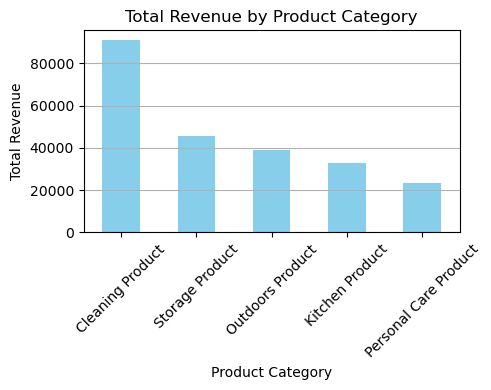

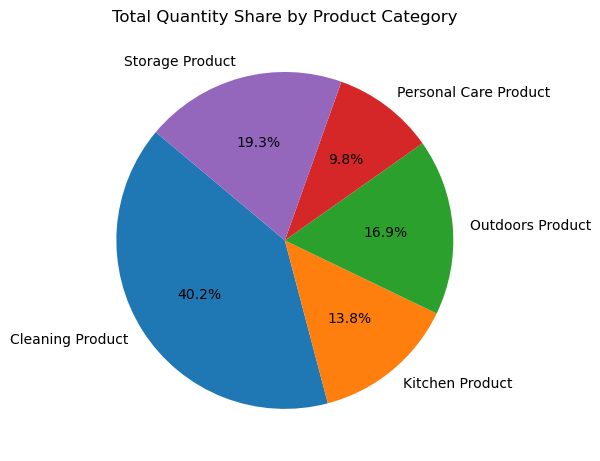

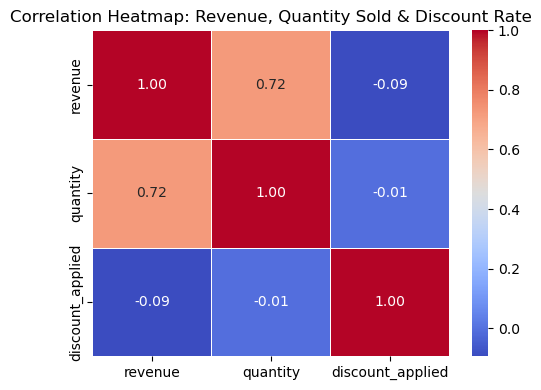

In [305]:
# Visualisation of product category by revenue and by quantity purchases
# Group by product category and sum revenue
product_category_revenue = merged_df.groupby('product_category')['revenue'].sum().sort_values(ascending=False)
product_category_quantity = merged_df.groupby('product_category')['quantity'].sum()
product_category_revenue2 = merged_df.groupby(['product_category', 'region_x'])['revenue'].sum().sort_values(ascending=False)

print ('Product revenue by region and product', round(product_category_revenue2, 0))
print ('Product revenue by product', round(product_category_revenue, 0))
# Plot bar chart
plt.figure(figsize=(5, 4))
product_category_revenue.plot(kind='bar', color='skyblue')
plt.title('Total Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')

# Plot a pie chart for quantity portion of each product category
plt.figure(figsize=(6, 6))
product_category_quantity.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Total Quantity Share by Product Category')
plt.ylabel('') 
plt.tight_layout()
plt.show()

# Heat map for corelation between quantity sold and discount rate
target = ['revenue','quantity', 'discount_applied']
corr_matrix = merged_df[target].corr()

# Plot heatmap for revenue, quantity and discount rate.
plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap: Revenue, Quantity Sold & Discount Rate')
plt.tight_layout()
plt.show()

In [101]:
#  • Customer behaviour by loyalty_tier and signup_month

In [102]:
merged_df.isnull().sum()

order_id            0
customer_id         0
product_id          0
quantity            0
unit_price          0
order_date          0
delivery_status     0
payment_method      0
region_x            0
discount_applied    0
product_name        0
category            0
launch_date         0
base_price          0
supplier_code       0
email               0
signup_date         0
gender              0
region_y            0
loyalty_tier        0
revenue             0
order_week          0
price_band          0
days_to_order       0
email_domain        0
is_late             0
product_category    0
dtype: int64

In [103]:
customer_behavior1 = merged_df['loyalty_tier'].value_counts()
customer_behavior1_percent = round(merged_df['loyalty_tier'].value_counts(normalize='True')*100, 0)

# Extractsignup month irrespective of year
merged_df['signup_month'] = merged_df['signup_date'].dt.month_name()

# Count signups per month
customer_behavior2 = merged_df['signup_month'].value_counts()
customer_behavior2_percent = round(merged_df['signup_month'].value_counts(normalize='True')*100, 0)

print ('Customer Behavior by Loyalty Tier' , customer_behavior1)
print ('Customer Behavior by Loyalty Tier %' , customer_behavior1_percent)
print ('Customer Behavior by Signup Month' , customer_behavior2)
print ('Customer Behavior by Signup Month %' , customer_behavior2_percent)


Customer Behavior by Loyalty Tier loyalty_tier
Gold      1675
Silver     653
Bronze     609
Name: count, dtype: int64
Customer Behavior by Loyalty Tier % loyalty_tier
Gold      57.0
Silver    22.0
Bronze    21.0
Name: proportion, dtype: float64
Customer Behavior by Signup Month signup_month
October      303
February     277
August       275
November     271
December     269
September    239
January      232
March        231
July         228
June         210
May          205
April        197
Name: count, dtype: int64
Customer Behavior by Signup Month % signup_month
October      10.0
February      9.0
August        9.0
November      9.0
December      9.0
September     8.0
January       8.0
March         8.0
July          8.0
June          7.0
May           7.0
April         7.0
Name: proportion, dtype: float64


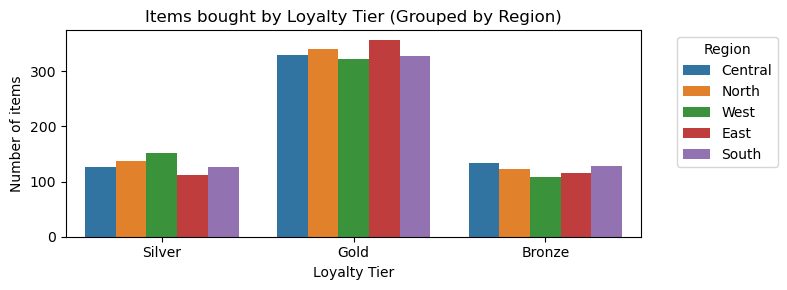

In [104]:
# Visual of items by layalty tier by region
plt.figure(figsize=(8, 3))
sns.countplot(data=merged_df, x='loyalty_tier', hue='region_x')

# Add labels and title
plt.title('Items bought by Loyalty Tier (Grouped by Region)')
plt.xlabel('Loyalty Tier')
plt.ylabel('Number of items')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [105]:
# • Delivery performance by region and price_band

# by region
delivery_performance1 = merged_df.groupby('region_x')['delivery_status'].value_counts()
delivery_performance1_percent = round(merged_df.groupby('region_x')['delivery_status'].value_counts(normalize='True')*100, 0)

# by price_band
delivery_performance2 = merged_df.groupby('price_band')['delivery_status'].value_counts()
delivery_performance2_percent = round(merged_df.groupby('price_band')['delivery_status'].value_counts(normalize='True')*100, 0)

# by price_band and region
delivery_performance3 = merged_df.groupby(['region_x','price_band'])['delivery_status'].value_counts()
delivery_performance3_percent = round(merged_df.groupby(['region_x','price_band'])['delivery_status'].value_counts(normalize='True')*100, 0)

print ('Delivery status', merged_df['delivery_status'].value_counts())
print ('Delivery performance by Region' , delivery_performance1)
print ('Delivery performance by Region %' , delivery_performance1_percent)
print ('Delivery performance by Price band' , delivery_performance2)
print ('Delivery performance by Price band %' , delivery_performance2_percent)
print ('Delivery performance by Price band and Region' , delivery_performance3)
print ('Delivery performance by Price band and Region %' , delivery_performance3_percent)

Delivery status delivery_status
Delivered    1211
Delayed      1144
Cancelled     582
Name: count, dtype: int64
Delivery performance by Region region_x  delivery_status
Central   Delivered          239
          Delayed            227
          Cancelled          124
East      Delayed            244
          Delivered          244
          Cancelled           95
North     Delivered          248
          Delayed            235
          Cancelled          117
South     Delivered          247
          Delayed            222
          Cancelled          114
West      Delivered          233
          Delayed            216
          Cancelled          132
Name: count, dtype: int64
Delivery performance by Region % region_x  delivery_status
Central   Delivered          41.0
          Delayed            38.0
          Cancelled          21.0
East      Delayed            42.0
          Delivered          42.0
          Cancelled          16.0
North     Delivered          41.0
          Del

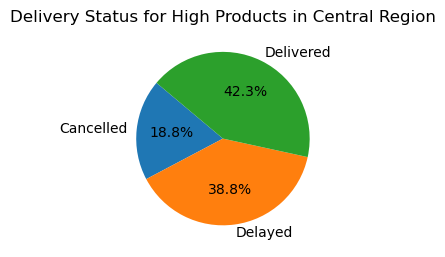

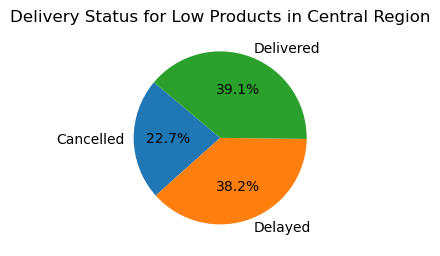

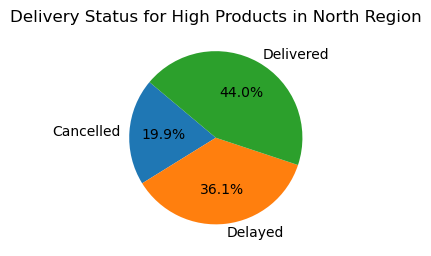

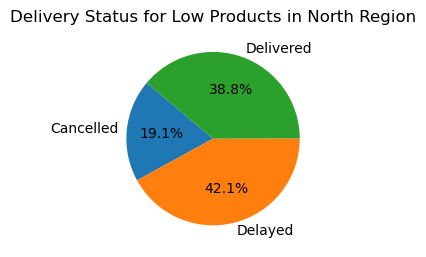

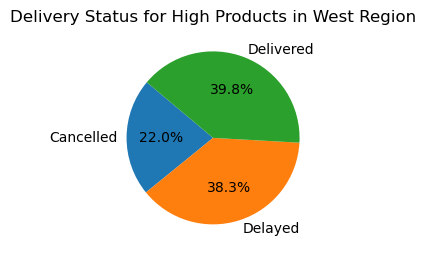

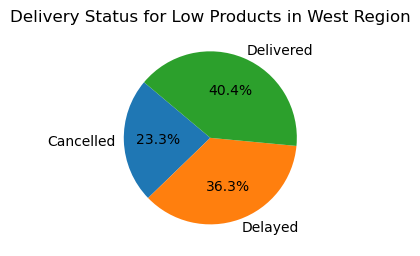

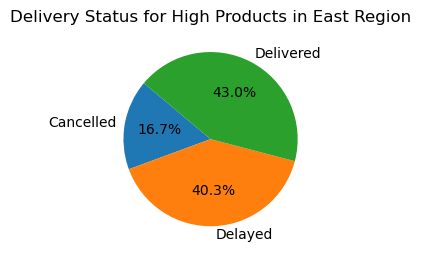

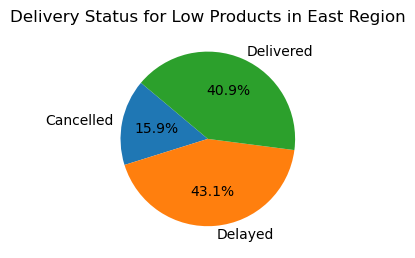

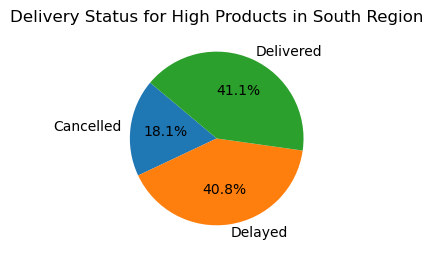

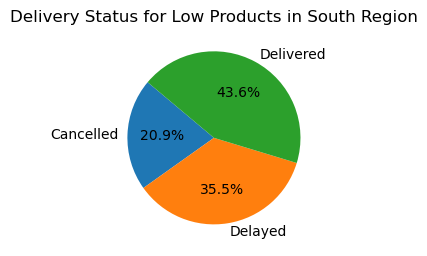

In [106]:
# visualisation of delivery status per region per price band
# Loop over each region
for region in merged_df['region_x'].dropna().unique():
    region_data = merged_df[merged_df['region_x'] == region]
    
    # Group by price_band and delivery_status
    group = region_data.groupby(['price_band', 'delivery_status']).size().unstack(fill_value=0)
    
    # Plot one pie chart per price_band in this region
    for price_band in group.index:
        plt.figure(figsize=(3, 3))
        plt.pie(group.loc[price_band], labels=group.columns, autopct='%1.1f%%', startangle=140)
        plt.title(f"Delivery Status for {price_band} Products in {region} Region")
        plt.tight_layout()
        plt.show()

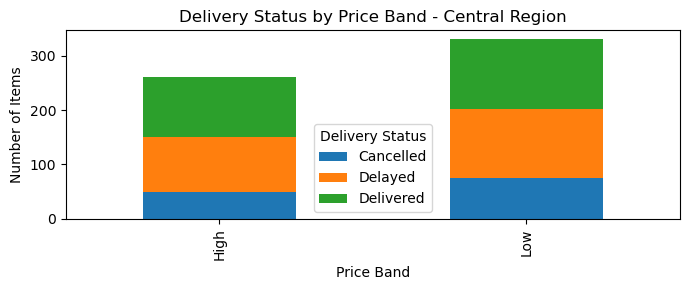

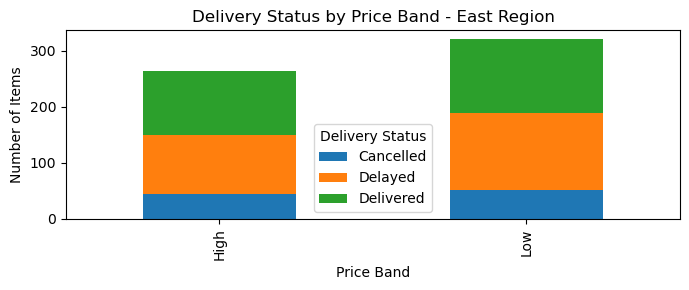

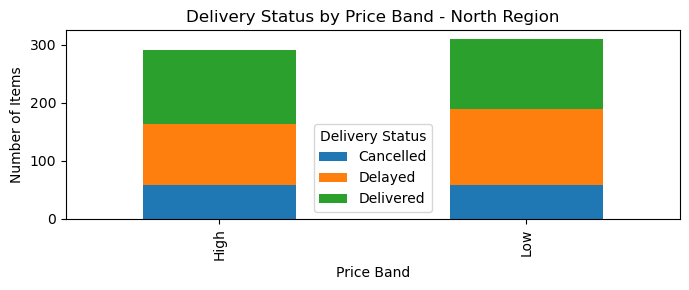

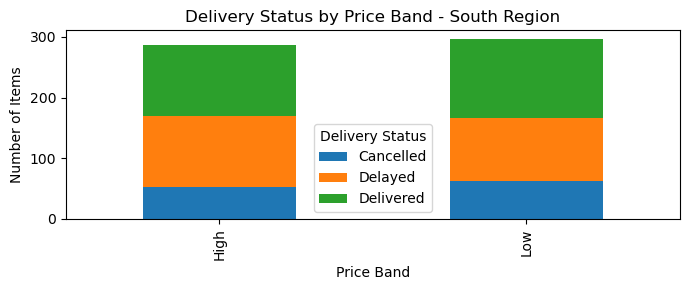

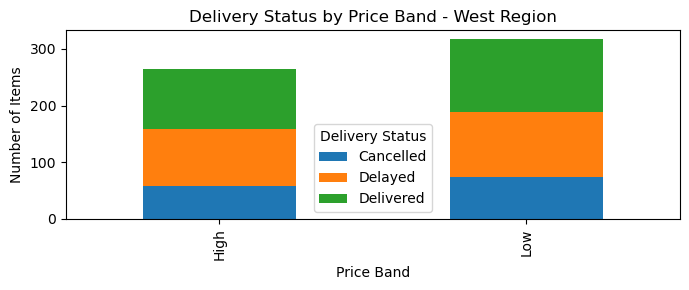

In [107]:
# Visualisation of delievery status by price band and region
# Group and count by region, price_band, and delivery_status
grouped = merged_df.groupby(['region_x', 'price_band', 'delivery_status']).size().reset_index(name='count')

# Pivot so delivery_status becomes columns, with counts as values
pivot = grouped.pivot_table(index=['region_x', 'price_band'], 
                             columns='delivery_status', 
                             values='count', 
                             fill_value=0)

# Flatten the index for easier plotting
pivot.reset_index(inplace=True)

# Loop through each region to plot one stacked bar chart
for region in pivot['region_x'].unique():
    region_data = pivot[pivot['region_x'] == region].set_index('price_band')

    # Drop region_x column (since all rows are same region)
    region_data = region_data.drop(columns='region_x', errors='ignore')

    # Plot stacked bar chart
    region_data.plot(kind='bar', stacked=True, figsize=(7, 3))
    plt.title(f"Delivery Status by Price Band - {region} Region")
    plt.xlabel("Price Band")
    plt.ylabel("Number of Items")
    plt.legend(title="Delivery Status")
    plt.tight_layout()
    plt.show()


In [108]:
# • Preferred payment methods by loyalty_tier
payment_method = merged_df.groupby('loyalty_tier')['payment_method'].value_counts()
payment_method_percent = round(merged_df.groupby('loyalty_tier')['payment_method'].value_counts(normalize='True')*100, 0)

print (payment_method)
print (payment_method_percent)

loyalty_tier  payment_method
Bronze        Credit card       275
              Bank transfer     175
              Paypal            159
Gold          Credit card       844
              Paypal            428
              Bank transfer     403
Silver        Credit card       304
              Bank transfer     190
              Paypal            159
Name: count, dtype: int64
loyalty_tier  payment_method
Bronze        Credit card       45.0
              Bank transfer     29.0
              Paypal            26.0
Gold          Credit card       50.0
              Paypal            26.0
              Bank transfer     24.0
Silver        Credit card       47.0
              Bank transfer     29.0
              Paypal            24.0
Name: proportion, dtype: float64


In [261]:
merged_df['signup_date']

0      2024-09-08
1      2024-08-06
2      2024-09-25
3      2024-07-28
4      2024-09-18
          ...    
2987   2024-11-01
2988   2024-10-24
2989   2025-02-24
2990   2024-10-22
2991   2025-02-05
Name: signup_date, Length: 2937, dtype: datetime64[ns]

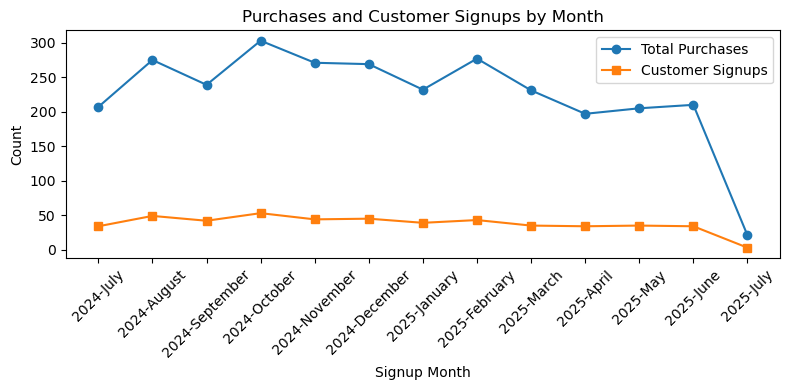

In [291]:
# signup date influence of purchase activity

# Extract signup_month as Period and as string
merged_df['signup_month'] = merged_df['signup_date'].dt.to_period('M')
merged_df['signup_month_str'] = merged_df['signup_date'].dt.strftime('%Y-%B')

# --- Aggregate total purchases per month ---
monthly_purchases = merged_df.groupby('signup_month').size().reset_index(name='num_purchases')
monthly_purchases['signup_month_str'] = monthly_purchases['signup_month'].dt.strftime('%Y-%B')

# --- Count number of signups per month (unique customer_id) ---
monthly_signups = merged_df.groupby('signup_month')['customer_id'].nunique().reset_index(name='num_signups')
monthly_signups['signup_month_str'] = monthly_signups['signup_month'].dt.strftime('%Y-%B')

# --- Merge both on month for aligned plotting ---
combined = pd.merge(monthly_purchases, monthly_signups, on='signup_month_str')

# --- Plot both lines ---
plt.figure(figsize=(8, 4))
plt.plot(combined['signup_month_str'], combined['num_purchases'], marker='o', label='Total Purchases')
plt.plot(combined['signup_month_str'], combined['num_signups'], marker='s', label='Customer Signups')

plt.xticks(rotation=45)
plt.xlabel('Signup Month')
plt.ylabel('Count')
plt.title('Purchases and Customer Signups by Month')
plt.legend()
plt.tight_layout()
plt.show()